# ASSIGNMENT 5: Frequency sampling, FIR filtering
In the frequency sampling method samples from the desired frequency response with intervals of $f_s/N$ are
taken. The impulse response of the filter is formed by inverse DFT from these samples. The continuous
frequency response of the filter goes along the defined points, but between them it gets undesired values. If
some frequency samples are also defined in the transition band, the Gibb’s phenomenon can be reduced.

Start by running the code block below to load the Python packages required to complete this assignment. To run the code, select the code block and push Ctrl+Enter or click the Run button.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

**Task 5.1** Generate ideal frequency response sample vectors H0_ideal and H2_ideal of a low-pass filter
using function *frqid*. For example:
```python
H0_ideal = frqid(fp, L, T)
```
The function returns an array of samples in the frequency domain. Use the following parameters: passband edge frequency fp = 0.225, length of the filter L = 29
and number of transition band samples T = 0 for H0_ideal and T = 2 for H2_ideal.

In [2]:
def frqid(fp, L, T):
    """
    frqid(fp, L, T)
    
    fp: normalized passband edge frequency [0, 0.5], fs = 1
    L: length of signal in samples
    T: number of transition band samples 0 - 3
    
    returns:
    H: sampled ideal frequency response with T transition band samples
    """
    # sampled amplitude response of the optimal filter
    passb = (np.fix(fp*L) + 1).astype('int')
    if (L % 2) == 0:
        s = -1
    else:
        s = 1
    
    # transition band samples 0, 1 and 3
    if (T == 0):
        Ad = np.concatenate((np.ones(passb), np.zeros(L - 2*passb + 1),
                             s*np.ones(passb-1)), axis=None) 
    elif (T == 1):
        Ad = np.concatenate((np.ones(passb-1), 0.5,
                             np.zeros(L - 2*passb + 1), 0.5,
                             s*np.ones(passb-2)), axis=None)
    elif (T == 2):
        Ad = np.concatenate((np.ones(passb-1), 0.67, 0.33,
                             np.zeros(L - 2*passb - 1), 0.33, 0.67,
                             s*np.ones(passb-2)), axis=None)
    elif (T == 3):
        Ad = np.concatenate((p.ones(passb-1), 0.75, 0.5, 0.25,
                             np.zeros(L - 2*passb - 3), 0.25, 0.5, 0.75,
                             s*np.ones(passb-2)), axis=None)
    else:
        print('Error: Number of transition band samples 0 - 3.')
    
    # sampled frequency response of the optimal filter
    M = (L-1) / 2
    k = np.arange(0, L)
    p = np.exp(2 * np.pi * 1j * (-M) * k/L)
    return Ad * p

In [3]:
# form the ideal sampled frequency responses
#Parameters
fp = 0.225
L = 29

#Gernerate H0_ideal with T=0
H0_ideal = frqid(fp,L, 0)
print("H0_ideal:", H0_ideal)

#Generate H2_ideal with T = 2
H2_ideal = frqid(fp, L, 2)
print("H2_ideal:", H2_ideal)


H0_ideal: [ 1.        +0.j         -0.99413796-0.10811902j  0.97662056+0.21497044j
 -0.94765317-0.31930153j  0.90757542+0.4198891j  -0.85685718-0.51555386j
  0.79609307+0.60517422j  0.        -0.j          0.        +0.j
  0.        -0.j          0.        +0.j          0.        -0.j
  0.        +0.j          0.        -0.j          0.        +0.j
  0.        +0.j         -0.        +0.j          0.        +0.j
 -0.        +0.j          0.        +0.j         -0.        +0.j
  0.        +0.j         -0.        +0.j          0.79609307-0.60517422j
 -0.85685718+0.51555386j  0.90757542-0.4198891j  -0.94765317+0.31930153j
  0.97662056-0.21497044j -0.99413796+0.10811902j]
H2_ideal: [ 1.        +0.j         -0.99413796-0.10811902j  0.97662056+0.21497044j
 -0.94765317-0.31930153j  0.90757542+0.4198891j  -0.85685718-0.51555386j
  0.53338235+0.40546672j -0.23957851-0.22694082j  0.        +0.j
  0.        -0.j          0.        +0.j          0.        -0.j
  0.        +0.j          0.        -

Calculate the impulse responses h0 and h2 from the samples of the ideal frequency responses using the
inverse Fourier transform (use the function `np.fft.ifft`). Remove the negligible imaginary parts (that should be zero) using
commands
```python
h0 = np.real(h0)
h2 = np.real(h2)
```


In [4]:
# calculcate the inverse dft for the sampled frequency responses
h0 = np.fft.ifft(H0_ideal)
h2 = np.fft.ifft(H2_ideal)
# take the real part of each resulting impulse response
h0 = np.real(h0)
h2 = np.real(h2)

print("h0:", h0)
print("h2:", h2)

h0: [ 0.02632005 -0.01801504 -0.03324548  0.0079795   0.03897195  0.0045044
 -0.04359422 -0.02105416  0.04716163  0.0459967  -0.04969902 -0.0954143
  0.05121819  0.31473187  0.44827586  0.31473187  0.05121819 -0.0954143
 -0.04969902  0.0459967   0.04716163 -0.02105416 -0.04359422  0.0045044
  0.03897195  0.0079795  -0.03324548 -0.01801504  0.02632005]
h2: [-8.32058534e-03  5.14241284e-03  7.49771088e-03 -1.11040409e-03
 -1.18410279e-03  4.31110762e-04 -1.01672137e-02 -7.91071495e-03
  2.43622199e-02  2.98587360e-02 -3.81328121e-02 -8.25735809e-02
  4.80938722e-02  3.09875420e-01  4.48275862e-01  3.09875420e-01
  4.80938722e-02 -8.25735809e-02 -3.81328121e-02  2.98587360e-02
  2.43622199e-02 -7.91071495e-03 -1.01672137e-02  4.31110762e-04
 -1.18410279e-03 -1.11040409e-03  7.49771088e-03  5.14241284e-03
 -8.32058534e-03]


Run the following commands to plot the final 512-point amplitude responses of the filters in the same figures with the original samples from the ideal frequency response:

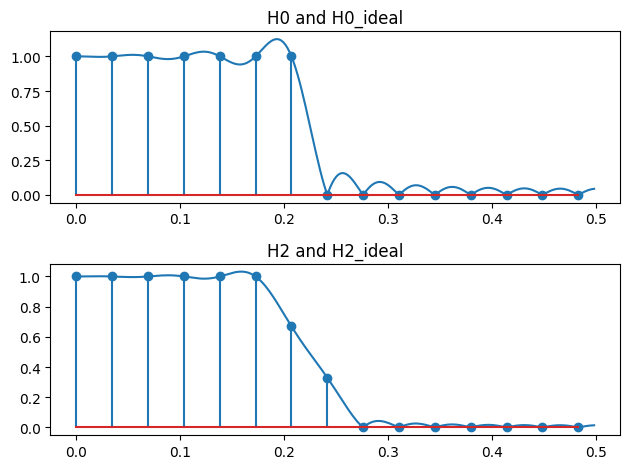

In [5]:
H0 = np.fft.fft(h0, 512)
H2 = np.fft.fft(h2, 512)
ff = np.arange(0, len(H0), dtype=float) / len(H0)
ff_ideal = np.arange(0, len(H0_ideal), dtype=float) / len(H0_ideal)

fig, ax = plt.subplots(2, 1)
ax[0].plot(ff[0:256], abs(H0[0:256]))
ax[0].stem(ff_ideal[0:15], abs(H0_ideal[0:15]))
ax[0].set_title("H0 and H0_ideal")
ax[1].plot(ff[0:256], abs(H2[0:256]))
ax[1].stem(ff_ideal[0:15], abs(H2_ideal[0:15]))
ax[1].set_title("H2 and H2_ideal")
fig.tight_layout()

If your design is correct, the final amplitude response curves will go through the points of the ideal amplitude
response.

**What is the advantage and disadvantage of also taking samples in the transition band?**

Taking samples in the transition band.

Advantages;
1. Reduced Gibbs Phenomenon. Including transition band samples can help reduce the Gibbs phenomenon (oscillations near the edges of the passband and stopband) by smoothing out the discontinuities in the frequency response.
2. Better Control over transition. By taking samples in the transition band, designers can have better control over the shape and characteristics of the transition. This can lead to a more accurate and controlled filter response, and reduce overall error.
3. Improved Filter Performance. Including transition band samples can lead to improved overall filter performance, such as better attenuation and reduced passband ripple, in some cases.

Disadvantages;
1. Increased Complexity. Taking samples in the transition band increases the complexity of the filter design process. It requires more careful consideration of the transition region and additional calculations for the transition band samples.
2. Longer Design Time. Including transition band samples may lead to a longer design and optimization process, as more parameters need to be adjusted and fine-tuned.

**Task 5.2** Load a set of ECG data with the following commands:

In [6]:
# load the signals ECG_clean and ECG_noisy
ECG_clean = np.loadtxt("ECG_clean.dat", delimiter=',')
ECG_noisy = np.loadtxt("ECG_noisy.dat", delimiter=',')

You have two signals: ECG_clean and ECG_noisy. The latter contains noise in addition to information. Your task is to filter the high
frequency noise away from the disturbed signal using your low-pass filter with impulse response h2
from the previous task.
The filtering can be done by using convolution. For example, the command
```python
y = signal.convolve(x, h)
```
calculates the convolution between the signal x and h, the impulse response of a filter, and stores the resulting signal in y.
Plot the amplitude spectra (= the absolute value of a DFT) of the following three signals to one
figure using the *subplots* or *subplot* command.

- the original noisy ecg signal (ECG_noisy)
- the clean ecg signal (ECG_clean)
- the filtered signal

Use the function *plot* to draw the amplitude spectra. Plotting them
with *stem* doesn’t look good.

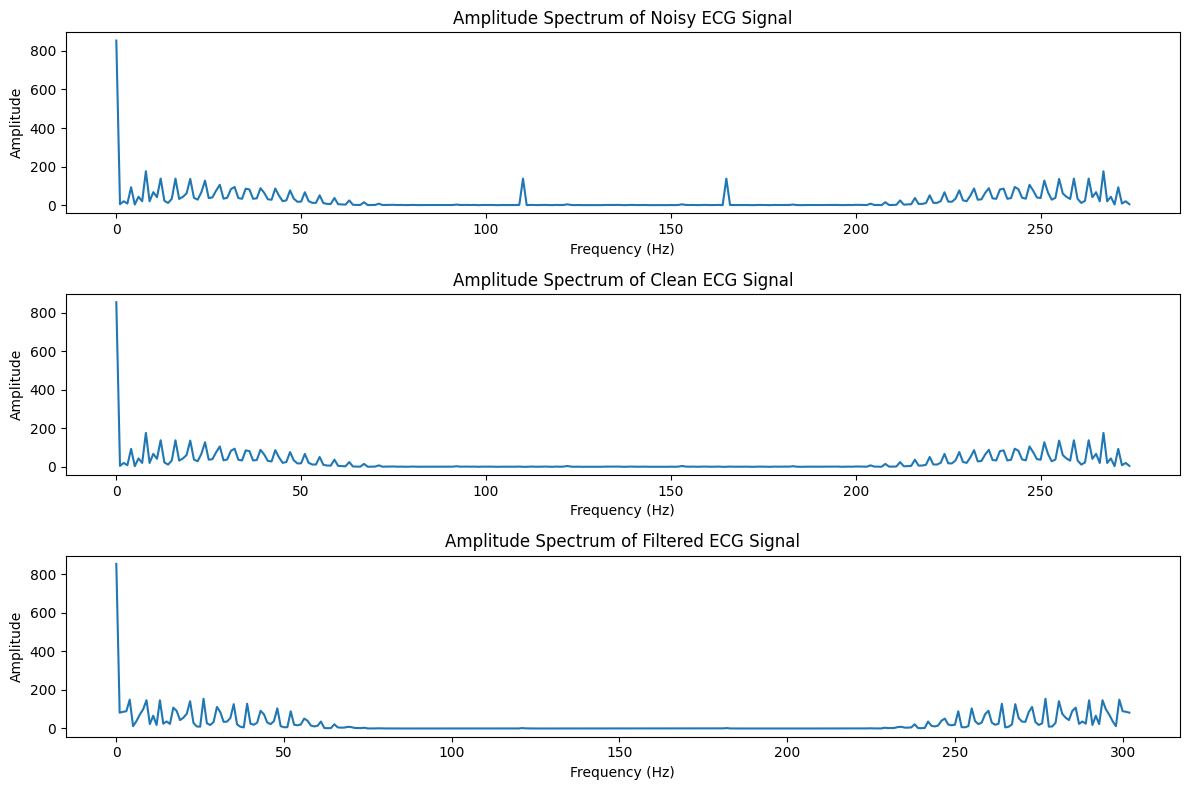

In [ ]:
# filter ECG_noisy using the low pass filter..with impulse response h2
filtered_signal = signal.convolve(ECG_noisy, h2)

# plot ECG_noisy, ECG_clean and the filtered signal

# Calculcate the amplitude spectra of the signals
ECG_noisy_spectrum = np.abs(np.fft.fft(ECG_noisy))
ECG_clean_spectrum = np.abs(np.fft.fft(ECG_clean))
filtered_signal_spectrum = np.abs(np.fft.fft(filtered_signal))

# Plot the amplitude spectra
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(ECG_noisy_spectrum)
plt.title('Amplitude Spectrum of Noisy ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(ECG_clean_spectrum)
plt.title('Amplitude Spectrum of Clean ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(filtered_signal_spectrum)
plt.title('Amplitude Spectrum of Filtered ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### Instructions for submission
1. Make sure that your code produces the desired results from scratch by selecting Kernel -> Restart & Run all. This will clear the output of your code and run all the code cells again from top to bottom.

2. Rename this notebook to `DF_Assignment5_firstname_lastname_studentnumber.ipynb`.

3. Submit only the resulting notebook (.ipynb file) to the return box in Moodle. Send your submission before the deadline to receive additional week exam points.